In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [23]:
d=pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df=d.copy()
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## 1. Missing values analysis
- Variables with missing values
- Percentage of missing values for each variable as a dataframe
- Drop missing values in RainToday and RainTomorrow variables

In [25]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [26]:
miss = df.isnull().sum().sort_values(ascending=False)
miss_per = (miss/len(df))*100
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


<AxesSubplot:>

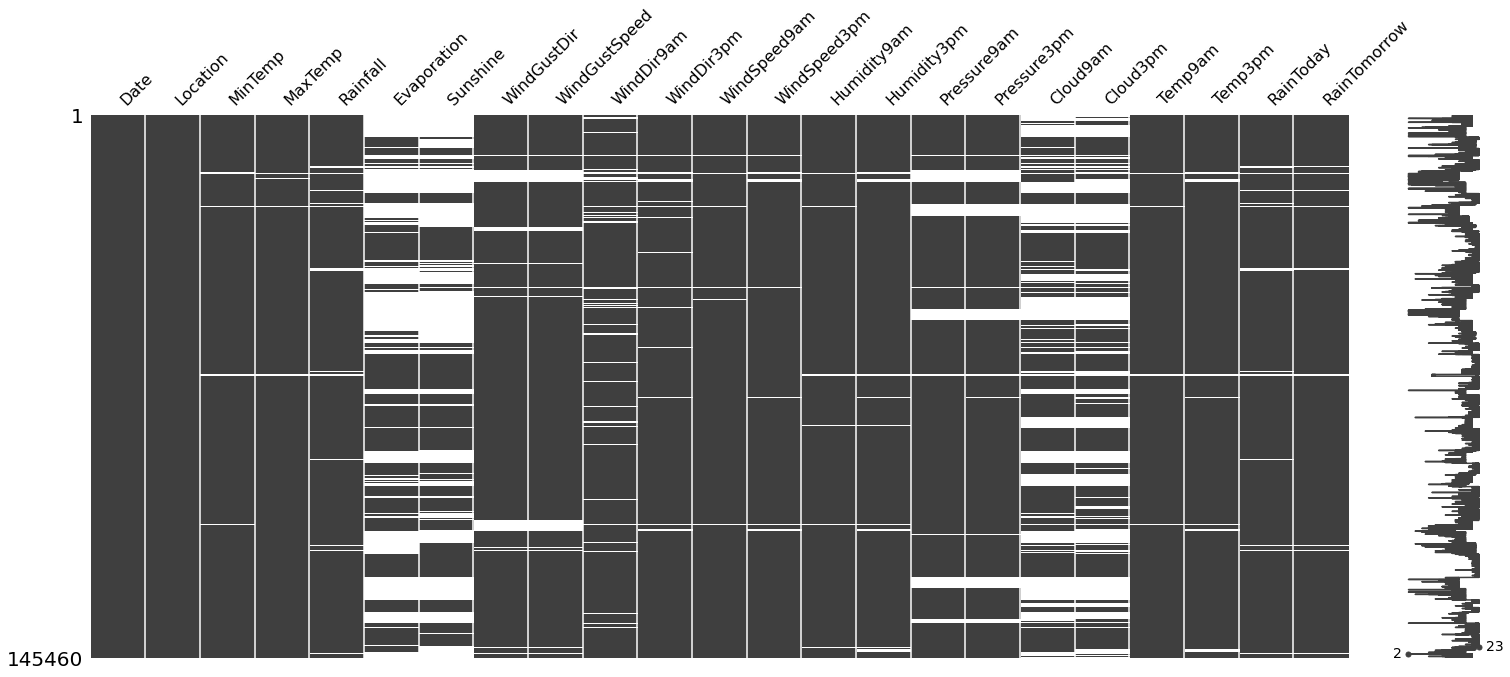

In [27]:
msno.matrix(df)

In [28]:
df.dropna(subset=['RainToday', 'RainTomorrow'],inplace=True)

In [29]:
df.isnull().sum().tail()

Cloud3pm        56094
Temp9am           656
Temp3pm          2624
RainToday           0
RainTomorrow        0
dtype: int64

## 2. Multivariate imputation with (a) selected algorithm(s) and label encoding
- Tip: May consider to drop some categorical variables with too many categories, if it takes too much time to get a result
- Tip: Do not forget to encode categorical variables.
- Tip: You get error if you have data type such as string or date. The values should be integer or float.

In [30]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,73982,146,66805,0.0,14.5
Evaporation,float64,81093,356,59694,0.0,145.0
Cloud3pm,float64,84693,11,56094,0.0,9.0
Cloud9am,float64,88162,11,52625,0.0,9.0
Pressure3pm,float64,127018,549,13769,977.1,1039.6
Pressure9am,float64,127044,546,13743,980.5,1041.0
WindDir9am,object,131127,17,9660,NaN,NaN
WindGustDir,object,131624,17,9163,NaN,NaN
WindGustSpeed,float64,131682,68,9105,6.0,135.0
WindDir3pm,object,137117,17,3670,NaN,NaN


__________Data Types__________

float64           16
object             6
datetime64[ns]     1
Name: Types, dtype: int64


In [32]:
# df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Date'],axis=1,inplace=True)

In [33]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [34]:
columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

Figure:  MinTemp


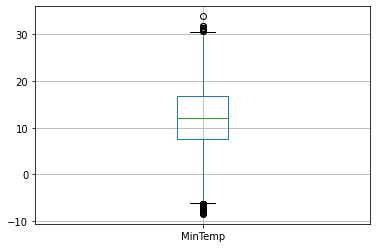

Figure:  MaxTemp


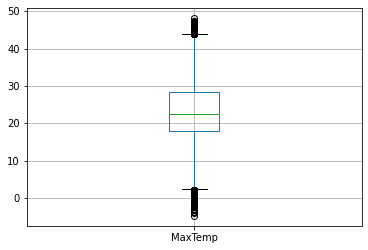

Figure:  Rainfall


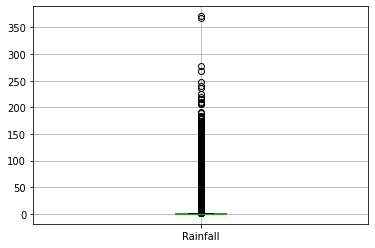

Figure:  Evaporation


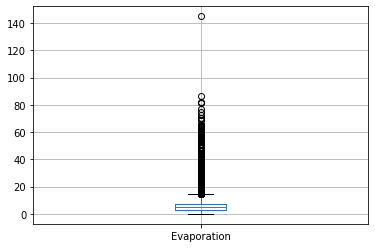

Figure:  Sunshine


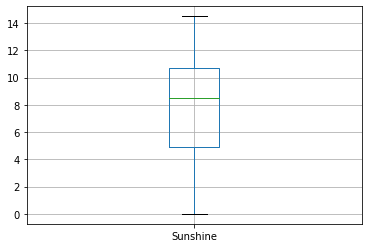

Figure:  WindGustSpeed


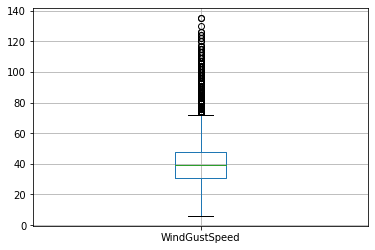

Figure:  WindSpeed9am


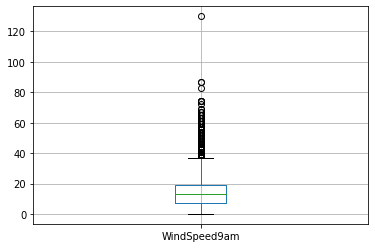

Figure:  WindSpeed3pm


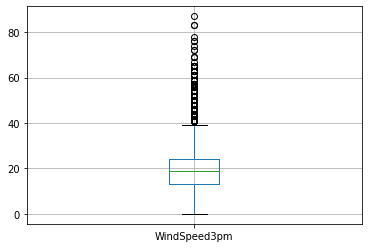

Figure:  Humidity9am


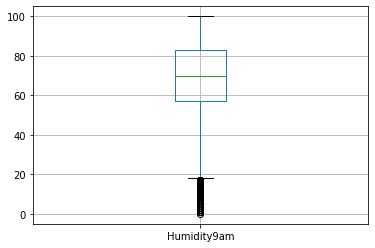

Figure:  Humidity3pm


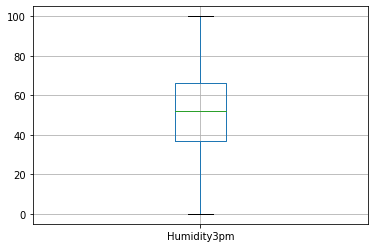

Figure:  Pressure9am


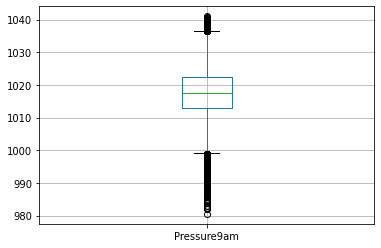

Figure:  Pressure3pm


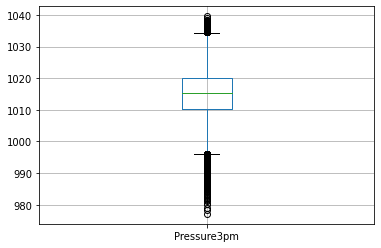

Figure:  Cloud9am


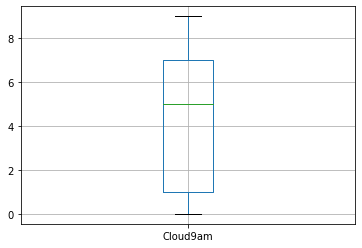

Figure:  Cloud3pm


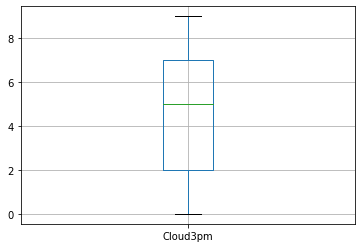

Figure:  Temp9am


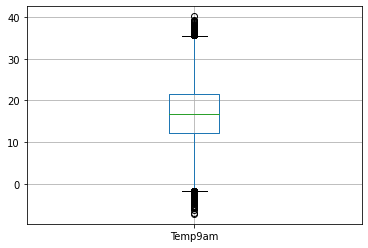

Figure:  Temp3pm


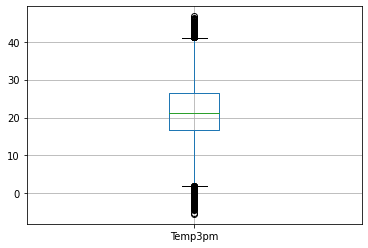

In [35]:
for i in columns:
    print('Figure: ',i)
    df.boxplot(column=[i])
    plt.show()

In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df2 = df.copy()

X = df2.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Date'], axis=1)
X = pd.get_dummies(X, drop_first=True, columns = ["RainToday","RainTomorrow"], prefix = ["RainToday","RainTomorrow"])

idx = X.index
col = X.columns

imp_mean = IterativeImputer(random_state=50)
imp_mean.fit(X)
X_imputed = imp_mean.transform(X)
X_imputed = pd.DataFrame(X_imputed, index=idx, columns=col)

X_imputed.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

## 3. Outliers
- Apply Z-score method to detect outliers
- Apply IQR method/boxplot visualization for selected variables to detect outliers
- Apply Isolation Forest and Local Outlier Factor methods to detect outliers
- Tip: Consider standardization based on the algorithm that you use.
- Decide on a threshold observation to replace outliers
- Replace the outliers with the threshold observation

In [37]:
from scipy import stats

df3 = df.select_dtypes(include='float64')
z = np.abs(stats.zscore(df3))
threshold = 3
print('List of outliers:', '\n', np.where(z > 3)[0], '\n', np.where(z > 3)[1])
print('Number of outliers:', np.where(z > 3)[0].shape)
print('row: 466, column: 11', z[140721][2])

List of outliers: 
 [   292    427    448 ... 140608 140609 140721] 
 [2 2 2 ... 2 2 2]
Number of outliers: (2409,)
row: 466, column: 11 3.80974384988638


In [38]:
Q1 = df['MinTemp'].quantile(0.25)
Q3 = df['MinTemp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

9.200000000000001


In [39]:
# create filter to detect values below and above outlier thresholds
(df['MinTemp'] < (Q1 - 1.5 * IQR)) |(df['MinTemp'] > (Q3 + 1.5 * IQR))

0         False
1         False
2         False
3         False
4         False
          ...  
145454    False
145455    False
145456    False
145457    False
145458    False
Name: MinTemp, Length: 140787, dtype: bool

In [40]:
# Values below or above outlier thresholds
print(df['MinTemp'][(df['MinTemp'] < (Q1 - 1.5 * IQR)) | (df['MinTemp'] > (Q3 + 1.5 * IQR))])

46848     -6.9
46849     -6.5
46909     -6.3
46922     -6.3
46923     -8.0
          ... 
105599    31.4
107341    31.4
108016    31.8
116368    31.2
144189    31.0
Name: MinTemp, Length: 61, dtype: float64


In [42]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

y = X_imputed['MinTemp']
X = X_imputed.drop(['MinTemp'], axis=1)

clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.10, random_state=50)
clf.fit(X)
y_pred = clf.predict(X)

# the model will predict an inlier with a label of +1 and an outlier with a label of -1

outliers_values = X[clf.predict(X) == -1]
outliers_values

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
8,31.9,0.0,9.033104,10.317344,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,2.026325,3.171689,18.3,30.2,0.0,1.0
12,18.6,15.6,4.318413,1.924263,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1.0,1.0
17,22.9,16.8,4.465611,6.298582,63.0,6.0,20.0,80.0,65.0,1005.8,1002.2,8.000000,1.000000,18.0,21.5,1.0,1.0
37,38.9,0.0,10.898312,13.799607,57.0,6.0,30.0,34.0,12.0,1007.0,1002.7,1.118579,1.395091,25.2,38.4,0.0,0.0
52,34.0,0.6,9.935701,9.905649,98.0,26.0,48.0,60.0,39.0,1005.3,997.8,4.000000,1.000000,26.1,33.1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145357,41.9,0.0,11.908427,13.659813,43.0,9.0,17.0,26.0,15.0,1009.7,1005.0,0.687537,1.535429,27.0,40.8,0.0,0.0
145362,39.7,0.0,12.042951,13.174056,48.0,13.0,11.0,22.0,9.0,1009.5,1005.6,0.658809,1.796871,26.9,38.6,0.0,0.0
145367,40.6,0.0,12.230627,12.794527,35.0,9.0,9.0,21.0,11.0,1010.0,1005.3,1.046568,1.866581,29.7,38.9,0.0,0.0
145368,41.6,0.0,12.292155,14.557466,37.0,9.0,20.0,20.0,9.0,1008.7,1005.1,0.293623,1.096449,28.6,40.4,0.0,0.0


In [43]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

col = X_imputed.columns

#note that we transform the data with MinMaxScaler
df_scaled = scaler.fit_transform(X_imputed)
df_scaled = pd.DataFrame(df_scaled, columns=col)

y = df_scaled['MinTemp']
X = df_scaled.drop(['MinTemp'], axis=1)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_
np.sort(X_scores)[:100]

array([-7.95474705e+08, -6.18494346e+08, -6.15743953e+08, -6.02796363e+08,
       -5.71627794e+08, -5.65782386e+08, -5.54724308e+08, -5.24389527e+08,
       -4.97848815e+08, -4.90520679e+08, -4.82791707e+08, -4.70806114e+08,
       -4.61988205e+08, -4.51008915e+08, -4.47691904e+08, -4.36495048e+08,
       -4.21409017e+08, -4.19689808e+08, -4.12745384e+08, -4.09438182e+08,
       -4.01773893e+08, -4.00226672e+08, -3.97766895e+08, -3.93121174e+08,
       -3.92454079e+08, -3.90138468e+08, -3.88108856e+08, -3.81132356e+08,
       -3.67772822e+08, -3.20701614e+08, -2.84873611e+08, -2.69320338e+08,
       -2.60880152e+08, -2.49918110e+08, -2.31888070e+08, -2.29640687e+08,
       -2.24756474e+08, -2.16043182e+08, -2.12063218e+08, -1.94220154e+08,
       -1.78027606e+08, -1.71553726e+08, -1.63149578e+08, -1.48125257e+08,
       -1.43048542e+08, -1.36369207e+08, -1.07850690e+08, -8.85696538e+07,
       -8.48164697e+07, -5.77228053e+07, -4.92296187e+07, -4.57350807e+07,
       -6.83421425e+06, -

In [46]:
threshold = np.sort(X_scores)[60]
threshold

-2.4830180538835656

In [47]:
# filter to detect to outliers
inliers = X_scores > threshold
inliers

array([ True,  True,  True, ...,  True,  True,  True])